# sprint19 セグメンテーション1 UNet

## 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。
https://github.com/zhixuhao/unet
GPU環境での学習》


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [1]:
from model import *
from data import *

Using TensorFlow backend.


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

1 membraneでUnetを鍛える
membraneはmembrane/フォルダにあるので、2値分類タスクです。

画像とマスクの入力形状は同じです：(batch_size,rows,cols,channel = 1)

### Train with data generator
データ生成器を使ったトレーニング

In [2]:
import keras

In [3]:
keras.__version__

'2.3.1'

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=100,epochs=5,callbacks=[model_checkpoint])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

 99/100 [============================>.] - ETA: 5s - loss: 0.6922 - accuracy: 0.7508 
Epoch 00001: loss improved from inf to 0.69219, saving model to unet_membrane.hdf5
100/100 [==============================] - 573s 6s/step - loss: 0.6922 - accuracy: 0.7506
Epoch 2/5
 99/100 [============================>.] - ETA: 5s - loss: 0.6904 - accuracy: 0.7456 
Epoch 00002: loss improved from 0.69219 to 0.69031, saving model to unet_membrane.hdf5
100/100 [==============================] - 574s 6s/step - loss: 0.6903 - accuracy: 0.7481
Epoch 3/5
 99/100 [============================>.] - ETA: 5s - loss: 0.6882 - accuracy: 0.7639 
Epoch 00003: loss improved from 0.69031 to 0.68830, saving model to unet_membrane.hdf5
100/100 [==============================] - 556s 6s/step - loss: 0.6883 - accuracy: 0.7584
Epoch 4/5
 99/100 [============================>.] - ETA: 5s - loss: 0.6875 - accuracy: 0.7196 
Epoch 00004: loss improved from 0.68830 to 0.68757, saving model to unet_membrane.hdf5
100/100 [===

### Train with npy file
npyファイルを使って学習します。

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results
モデルのテストと予測結果の保存

In [4]:
testGene = testGenerator("data/membrane/test")
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 256, 256, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_48[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_49[0][0]                  
____________________________________________________________________________________________

30/30 [==============================] - 22s 749ms/step


/Users/arisa/dic/課題/U-Net/unet-master/data.py:124: UserWarning: data/membrane/test/0_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/Users/arisa/dic/課題/U-Net/unet-master/data.py:124: UserWarning: data/membrane/test/1_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/Users/arisa/dic/課題/U-Net/unet-master/data.py:124: UserWarning: data/membrane/test/2_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/Users/arisa/dic/課題/U-Net/unet-master/data.py:124: UserWarning: data/membrane/test/3_predict.png is 

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/Users/arisa/dic/課題/U-Net/unet-master/data.py:124: UserWarning: data/membrane/test/28_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/Users/arisa/dic/課題/U-Net/unet-master/data.py:124: UserWarning: data/membrane/test/29_predict.png is a low contrast image
  io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


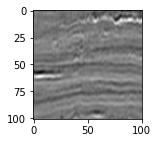

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(2,2))
plt.imshow(mpimg.imread("./data/membrane/test/0.png"))

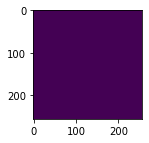

In [12]:
plt.figure(figsize=(2,2))
plt.imshow(mpimg.imread("./data/membrane/test/0_predict.png"))

学習が少なかったため、グレーもしくは黒のpredict画像が出力された

## 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。
https://arxiv.org/pdf/1505.04597.pdf

model.py >unet メソッド の中で論文のFig.1にある処理（U-net）を行っている


左半分の畳み込みとdropをdrop5 = Dropout(0.5)(conv5)までで行っており


up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
からup sampling（畳み込みの反対）している。


merge6 = concatenate([drop4,up6], axis = 3)から9のconcatenateでskip-conectionを行っている